In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\11804939\Downloads\advertising (1).csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [9]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm =train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [6]:
X=df['TV']
y=df['Sales']

In [12]:
X_train_lm.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [13]:
import statsmodels.api as sm

In [17]:
X_train_sm=sm.add_constant(X_train_lm)

lr=sm.OLS(y_train_lm,X_train_sm).fit()

In [18]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [19]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.52e-52
Time:                        10:53:49   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

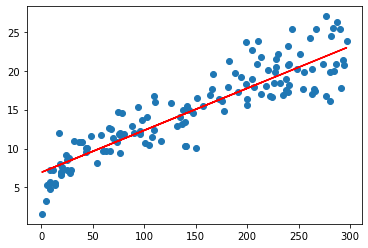

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X_train_lm, y_train_lm)
plt.plot(X_train_lm, 6.948 + 0.054*X_train_lm, 'r')
plt.show()

In [23]:
y_pred=lr.predict(X_train_sm)

In [25]:
res=(y_train_lm-y_pred)

In [26]:
import seaborn as sns

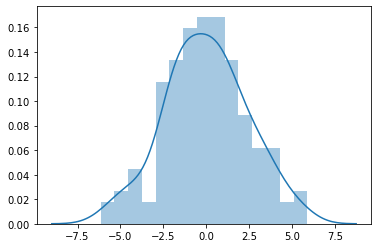

In [27]:
sns.distplot(res,bins=15)
plt.show()

In [29]:
X_test_sm=sm.add_constant(X_test_lm)
y_pred=lr.predict(X_test_sm)

In [30]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64